In [2]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib




In [6]:
# file path
file_path = r"D:\downloads\new one downliad\Main Resumes\Project\dataset\Data_1.xlsx"

In [7]:
sheet_name = 'Churn_Data'

In [8]:
# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [9]:
# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married      State  Number_of_Referrals  \
0   13500-BIH    Male   51      No      Bihar                    9   
1   14622-PUN  Female   49     Yes     Punjab                    9   
2   15658-RAJ  Female   56      No  Rajasthan                    8   
3   15714-KAR    Male   38      No  Karnataka                   13   
4   16325-HAR    Male   65      No    Haryana                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                18         no            No             No  ...   
1                15         no            No             No  ...   
2                33         no            No             No  ...   
3                24         no            No             No  ...   
4                24         no            No             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      56.400002   2928.500000           0.0   
1  Bank Withdrawal      34.250000    163

In [10]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

 

# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

 

# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

 

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

 

# Train the model

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[808  54]
 [121 219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       862
           1       0.80      0.64      0.71       340

    accuracy                           0.85      1202
   macro avg       0.84      0.79      0.81      1202
weighted avg       0.85      0.85      0.85      1202



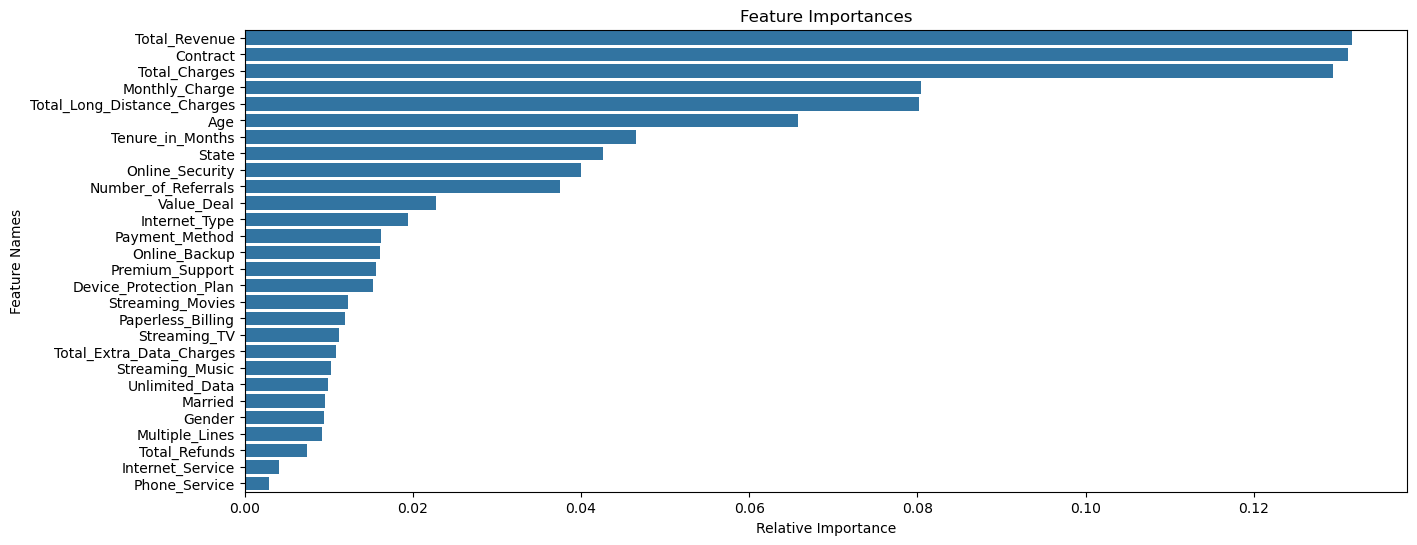

In [13]:

# Make predictions

y_pred = rf_model.predict(X_test)

# Evaluate the model

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Feature Selection using Feature Importance

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [14]:
# Define the path to the Joiner Data Excel file
file_path = r"D:\downloads\new one downliad\Main Resumes\Project\dataset\Data_1.xlsx"

# Define the sheet name to read data from
sheet_name = 'Joined_Data'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])
    
# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"D:\downloads\new one downliad\Main Resumes\Project\dataset\Prediction.csv", index=False)

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   16032-AND  Female   47      No  Andhra Pradesh                    8   
1   17250-HAR  Female   23     Yes         Haryana                   12   
2   19041-AND  Female   36      No  Andhra Pradesh                    6   
3   54564-AND  Female   55     Yes  Andhra Pradesh                   11   
4   65987-TAM    Male   52     Yes      Tamil Nadu                    9   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                18         no           Yes             No  ...   
1                 2         no           Yes             No  ...   
2                21     Deal 5            No             No  ...   
3                 7         no           Yes            Yes  ...   
4                34     Deal 5           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      46.599998     87.900002           0.0   
1      Cre